In [1]:
# Power and sample size calculation
# For Microbiome studies

# Following this publication for Power Calculation
# https://www.nature.com/articles/s41385-022-00548-1

# By: Ashok K. Sharma
# Date: 09-24-2024

In [2]:
# Type2: Comparison of the difference in proportions between two groups
# Note: Proportions between two groups is useful to compare the presence or absence of one particular species between two groups

#Standard formulae
#The following formula is used to estimate per group sample size for a difference in proportions, assuming equal sample sizes in both groups44
#n 1⁄4 2
#ðP P Þ2
#;Equation C
#ðZ1α þZ1βÞ2 ðP1ð1P1ÞþP2ð1P2ÞÞ
#where:
#12
#• P1 = the proportion in the first group
#• P2 = the proportion in the second group.
#• Z1α 1⁄4 1:96 (α 1⁄4 0:05), Z1β 1⁄4 0:84 (β 1⁄4 0:20) 2
#• P1 −P2 = Effect Size (difference in proportions).
#If n1 ≠n2; the ratio between the sample sizes of the two groups is r 1⁄4 n1. Then the formulas that are
#43 n2 used to compute sample size and power are given below, respectively:
#n1 =rn2, and
#2
#n2 1⁄4 ðp1ð1p1Þ þ p2ð1  p2ÞÞðz1α þz1βÞ2;Equation D
#r p1 p2
#For a test statistic t, and for the normal density function φð:Þ, power can be estimated by:
#1  β 1⁄4 φðt  Z1αÞ þ φðt  Z1αÞ, Equation E

Sample Sizes for Equal Group Sizes (p1 | p2 | Sample Size):
p1 = 0.4, p2 = 0.5: 770 per group
p1 = 0.3, p2 = 0.5: 181 per group
p1 = 0.2, p2 = 0.5: 72 per group

Sample Sizes for Unequal Group Sizes (p1 | p2 | Ratio | Group 1 Size | Group 2 Size):
p1 = 0.4, p2 = 0.5, Ratio = 1.0: Group 1 = 385, Group 2 = 385
p1 = 0.4, p2 = 0.5, Ratio = 2.0: Group 1 = 386, Group 2 = 193
p1 = 0.4, p2 = 0.5, Ratio = 3.0: Group 1 = 387, Group 2 = 129
p1 = 0.3, p2 = 0.5, Ratio = 1.0: Group 1 = 91, Group 2 = 91
p1 = 0.3, p2 = 0.5, Ratio = 2.0: Group 1 = 92, Group 2 = 46
p1 = 0.3, p2 = 0.5, Ratio = 3.0: Group 1 = 93, Group 2 = 31
p1 = 0.2, p2 = 0.5, Ratio = 1.0: Group 1 = 36, Group 2 = 36
p1 = 0.2, p2 = 0.5, Ratio = 2.0: Group 1 = 36, Group 2 = 18
p1 = 0.2, p2 = 0.5, Ratio = 3.0: Group 1 = 36, Group 2 = 12


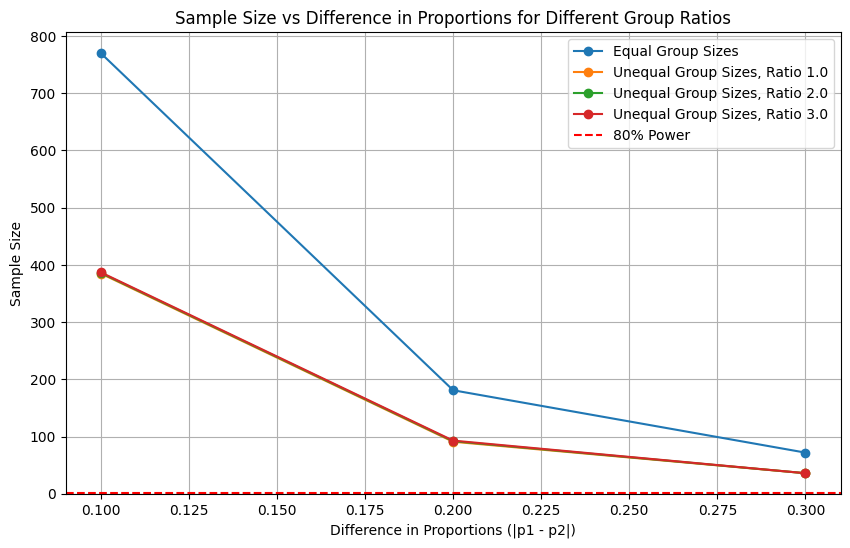

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to calculate sample size for difference in proportions (equal group sizes)
def sample_size_proportions_equal_groups(p1, p2, alpha=0.05, power=0.8):
    # Z-scores for alpha and power
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test (Z1-α)
    Z_beta = norm.ppf(power)  # Z1-β
    
    # Difference in proportions (Effect Size)
    effect_size = p1 - p2
    
    # Combined variance term
    pooled_variance = p1 * (1 - p1) + p2 * (1 - p2)
    
    # Sample size calculation for equal group sizes (Equation C)
    sample_size = (2 * pooled_variance * (Z_alpha + Z_beta)**2) / effect_size**2
    return int(np.ceil(sample_size))  # Round up to the next whole number

# Function to calculate sample size for difference in proportions (unequal group sizes)
def sample_size_proportions_unequal_groups(p1, p2, r, alpha=0.05, power=0.8):
    # Z-scores for alpha and power
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test (Z1-α)
    Z_beta = norm.ppf(power)  # Z1-β
    
    # Difference in proportions (Effect Size)
    effect_size = p1 - p2
    
    # Combined variance term
    pooled_variance = p1 * (1 - p1) + p2 * (1 - p2)
    
    # Sample size calculation for unequal group sizes (Equation D)
    n2 = (pooled_variance * (Z_alpha + Z_beta)**2) / (r * effect_size**2)
    n2 = int(np.ceil(n2))  # Round up to the next whole number
    
    # Sample size for the larger group (n1)
    n1 = int(np.ceil(r * n2))  # Larger group size based on ratio
    
    return n1, n2

# Define parameters for proportions
proportions = [(0.4, 0.5), (0.3, 0.5), (0.2, 0.5)]  # Example proportions (p1, p2)
alpha = 0.05  # Type I error rate
power = 0.8  # Desired power (80%)

# Store sample sizes for plotting
sample_sizes_equal_proportions = {}
sample_sizes_unequal_proportions = {}

# Ratios for unequal group sizes
ratios = [1.0, 2.0, 3.0]  # r values

# Calculate sample sizes for equal group sizes (proportions)
for p1, p2 in proportions:
    sample_sizes_equal_proportions[(p1, p2)] = sample_size_proportions_equal_groups(p1, p2, alpha, power)

# Calculate sample sizes for unequal group sizes (proportions)
for p1, p2 in proportions:
    for r in ratios:
        sample_sizes_unequal_proportions[(p1, p2, r)] = sample_size_proportions_unequal_groups(p1, p2, r, alpha, power)

# Print the results for equal group sizes
print("Sample Sizes for Equal Group Sizes (p1 | p2 | Sample Size):")
for (p1, p2) in sample_sizes_equal_proportions:
    print(f"p1 = {p1}, p2 = {p2}: {sample_sizes_equal_proportions[(p1, p2)]} per group")

# Print the results for unequal group sizes
print("\nSample Sizes for Unequal Group Sizes (p1 | p2 | Ratio | Group 1 Size | Group 2 Size):")
for (p1, p2, r) in sample_sizes_unequal_proportions:
    n1, n2 = sample_sizes_unequal_proportions[(p1, p2, r)]
    print(f"p1 = {p1}, p2 = {p2}, Ratio = {r}: Group 1 = {n1}, Group 2 = {n2}")

# Plot sample sizes vs difference in proportions
effect_sizes_proportions = [abs(p1 - p2) for p1, p2 in proportions]
plt.figure(figsize=(10, 6))
plt.plot(effect_sizes_proportions, [sample_sizes_equal_proportions[(p1, p2)] for p1, p2 in proportions],
         label="Equal Group Sizes", marker='o')

for r in ratios:
    plt.plot(effect_sizes_proportions, [sample_sizes_unequal_proportions[(p1, p2, r)][0] for p1, p2 in proportions],
             label=f"Unequal Group Sizes, Ratio {r}", marker='o')

plt.title('Sample Size vs Difference in Proportions for Different Group Ratios')
plt.xlabel('Difference in Proportions (|p1 - p2|)')
plt.ylabel('Sample Size')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Power')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Basic Power Calculation:
#- Microbime data (Diversity Only): #- Instead of using Direct Diversity data: Proportions can be used (with Threshold): For example: 
    # Proportion P1 (Cases with high diversity): 0.7083333333333334
    # Proportion P2 (Controls with high diversity): 0.8333333333333334
#- With fixed Effect Size - computed on microbiome Data (with Equal and Unequal Number of Samples)

Proportion P1 (Cases with high diversity): 0.7083333333333334
Proportion P2 (Controls with high diversity): 0.8333333333333334
Equal group sizes detected. Using Equation C.
P1: 0.7083333333333334, P2: 0.8333333333333334
Numerator: 2.6543413379101763, Denominator: 0.015625
P1: 0.7083333333333334, P2: 0.8333333333333334
Numerator: 3.0056137901682303, Denominator: 0.015625
P1: 0.7083333333333334, P2: 0.8333333333333334
Numerator: 3.384897389565783, Denominator: 0.015625
P1: 0.7083333333333334, P2: 0.8333333333333334
Numerator: 3.8005953889426416, Denominator: 0.015625
P1: 0.7083333333333334, P2: 0.8333333333333334
Numerator: 4.264726819729755, Denominator: 0.015625
P1: 0.7083333333333334, P2: 0.8333333333333334
Numerator: 4.795586630599201, Denominator: 0.015625
P1: 0.7083333333333334, P2: 0.8333333333333334
Numerator: 5.423357871998157, Denominator: 0.015625
P1: 0.7083333333333334, P2: 0.8333333333333334
Numerator: 6.203823081250926, Denominator: 0.015625


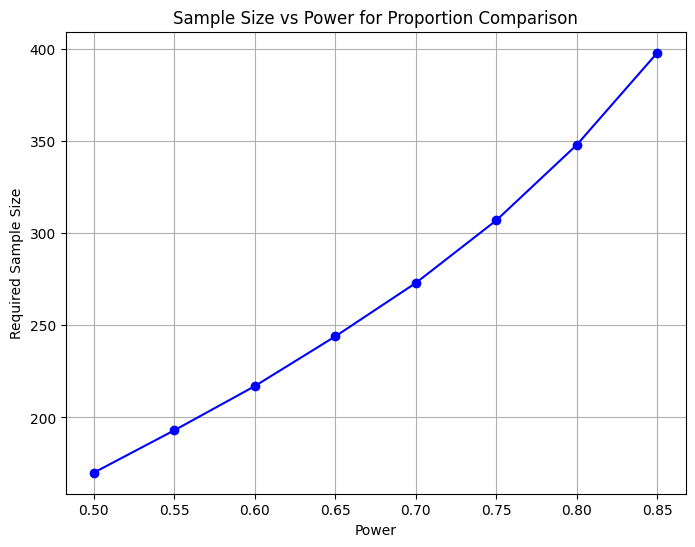

Power: 0.50, Sample Size: 170
Power: 0.55, Sample Size: 193
Power: 0.60, Sample Size: 217
Power: 0.65, Sample Size: 244
Power: 0.70, Sample Size: 273
Power: 0.75, Sample Size: 307
Power: 0.80, Sample Size: 348
Power: 0.85, Sample Size: 398


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load microbiome diversity or proportion data
data = pd.read_csv('../data/Richness_total_Equal.csv')  # Equal number of samples
# For unequal groups, use: data = pd.read_csv('Richness_total.csv')

################################################################################
# This is basic
# Define column names for proportions (update according to your data)
#group_column = 'Group'
#p1_column = 'P1'  # Proportion in group 1
#p2_column = 'P2'  # Proportion in group 2

# Get the proportions from your dataset (replace with actual column names)
#P1 = np.mean(data[p1_column])
#P2 = np.mean(data[p2_column])
###############################################################################

################################################################################
# ******* Replacing Basic Chunk of Code with this code
# Define column names
group_column = 'Group'   # The column that defines 'Cases' and 'Controls'
shannon_column = 'Shannon'  # Column for Shannon diversity

# Split data into Cases and Controls
case_data = data[data[group_column] == 'Cases']
control_data = data[data[group_column] == 'Controls']

# Define a threshold for high Shannon diversity (you can adjust this threshold based on your data)
shannon_threshold = 2.0  # Example threshold for high diversity

# Calculate proportion of high Shannon diversity (above the threshold) in each group
P1 = np.mean(case_data[shannon_column] > shannon_threshold)  # Proportion in 'Cases'
P2 = np.mean(control_data[shannon_column] > shannon_threshold)  # Proportion in 'Controls'

# Print the proportions
print(f"Proportion P1 (Cases with high diversity): {P1}")
print(f"Proportion P2 (Controls with high diversity): {P2}")
################################################################################

# Function to calculate sample size for equal group sizes (Equation C)
def sample_size_equal_proportions(P1, P2, alpha=0.05, power=0.8):
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    numerator = 2 * (Z_alpha + Z_beta) ** 2 * (P1 * (1 - P1) + P2 * (1 - P2))
    denominator = (P1 - P2) ** 2
    
    # Debugging information
    print(f"P1: {P1}, P2: {P2}")
    print(f"Numerator: {numerator}, Denominator: {denominator}")
    
    if denominator == 0 or np.isnan(denominator):
        return np.nan  # Avoid division by zero
    return int(np.ceil(numerator / denominator))

# Function to calculate sample size for unequal group sizes (Equation D)
def sample_size_unequal_proportions(P1, P2, r, alpha=0.05, power=0.8):
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    numerator = (Z_alpha + Z_beta) ** 2 * (P1 * (1 - P1) + P2 * (1 - P2))
    denominator = (P1 - P2) ** 2
    
    if denominator == 0 or np.isnan(denominator):
        return np.nan  # Avoid division by zero
    
    n2 = int(np.ceil(numerator / denominator))  # Sample size of smaller group
    n1 = int(np.ceil(r * n2))  # Sample size of larger group
    return n1, n2

# Determine the group sizes and proportion differences
group_sizes = data.groupby(group_column).size()
n_case = group_sizes['Cases']
n_control = group_sizes['Controls']

# Determine if groups are equal or unequal in size
if n_case == n_control:
    print("Equal group sizes detected. Using Equation C.")
    sample_size_func = sample_size_equal_proportions
else:
    print(f"Unequal group sizes detected (Case: {n_case}, Control: {n_control}). Using Equation D.")
    ratio = max(n_case, n_control) / min(n_case, n_control)
    sample_size_func = lambda P1, P2, alpha, power: sample_size_unequal_proportions(P1, P2, ratio, alpha, power)

# Define power levels and significance level
power_levels = np.arange(0.5, 0.9, 0.05)  # Power levels
alpha = 0.05

# Calculate sample sizes for different power levels
sample_sizes = []
for power in power_levels:
    sample_size = sample_size_func(P1, P2, alpha, power)
    if isinstance(sample_size, tuple):
        sample_sizes.append(max(sample_size))  # Use the larger sample size for unequal groups
    elif np.isnan(sample_size):
        print(f"Sample size calculation failed for power: {power}")
        sample_sizes.append(np.nan)
    else:
        sample_sizes.append(sample_size)

# Plotting power vs. sample size
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes, marker='o', linestyle='-', color='b')
plt.title('Sample Size vs Power for Proportion Comparison')
plt.xlabel('Power')
plt.ylabel('Required Sample Size')
plt.grid(True)
plt.show()

# Print the results
for power, sample_size in zip(power_levels, sample_sizes):
    print(f"Power: {power:.2f}, Sample Size: {sample_size}")


In [5]:
# Stratified Analysis to include the Secondary Group (If it's Binary)

#To add Alcohol as a secondary factor while keeping the structure of your current code, you can implement it as another covariate in your analysis. Here's how you can modify the code:

#Add the Alcohol Factor: We will add a column for Alcohol as a secondary factor (adjust according to the actual column name in your dataset). We can calculate the proportions of high Shannon diversity for different levels of alcohol consumption (Alcohol = Yes and Alcohol = No).
#Calculate Proportions for Each Group (Cases/Controls) with Respect to Alcohol Consumption: We'll break down the data into four categories:

#Cases with Alcohol Consumption
#Cases without Alcohol Consumption
#Controls with Alcohol Consumption
#Controls without Alcohol Consumption
#Update Sample Size Calculations: We'll calculate proportions of high Shannon diversity within each of the four groups and adjust the sample size calculations accordingly.


Alcohol Status: Yes
Proportion P1 (Cases with high diversity): 0.75
Proportion P2 (Controls with high diversity): 0.875
Unequal group sizes detected (Case: 20, Control: 16). Using Equation D.


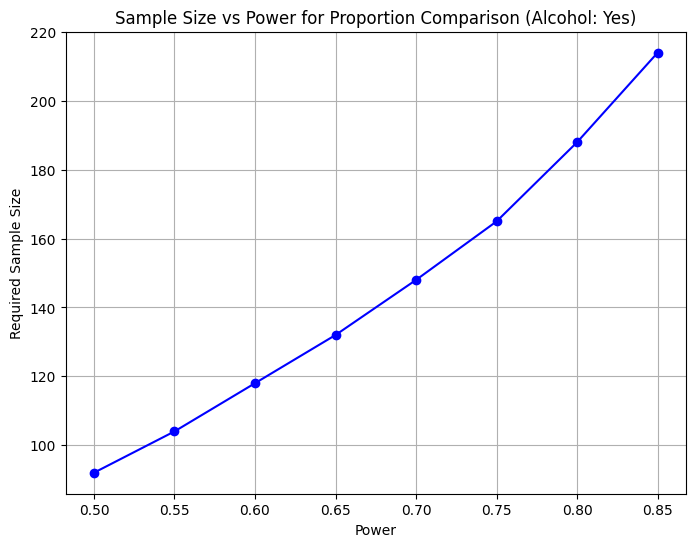

Power: 0.50, Sample Size: 92
Power: 0.55, Sample Size: 104
Power: 0.60, Sample Size: 118
Power: 0.65, Sample Size: 132
Power: 0.70, Sample Size: 148
Power: 0.75, Sample Size: 165
Power: 0.80, Sample Size: 188
Power: 0.85, Sample Size: 214

Alcohol Status: No
Proportion P1 (Cases with high diversity): 0.5
Proportion P2 (Controls with high diversity): 0.75
Unequal group sizes detected (Case: 4, Control: 8). Using Equation D.


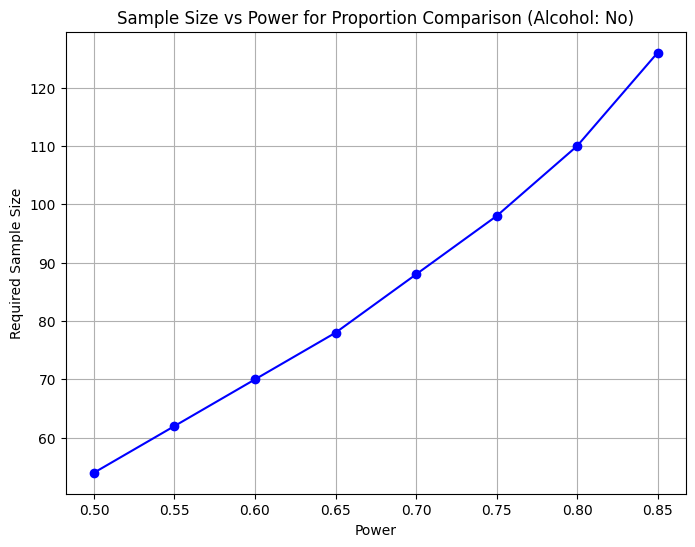

Power: 0.50, Sample Size: 54
Power: 0.55, Sample Size: 62
Power: 0.60, Sample Size: 70
Power: 0.65, Sample Size: 78
Power: 0.70, Sample Size: 88
Power: 0.75, Sample Size: 98
Power: 0.80, Sample Size: 110
Power: 0.85, Sample Size: 126


In [7]:
# Two separate analysis for Secondary Factor:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load microbiome diversity or proportion data
data = pd.read_csv('../data/Richness_total_Equal.csv')  # Equal number of samples
data['Alcohol'] = data['Alcohol'].apply(lambda x: 'No' if x == 'Never' else 'Yes')

# Define column names
group_column = 'Group'   # The column that defines 'Cases' and 'Controls'
shannon_column = 'Shannon'  # Column for Shannon diversity
alcohol_column = 'Alcohol'  # Column for Alcohol consumption (Yes/No)

# Split data into groups
case_data = data[data[group_column] == 'Cases']
control_data = data[data[group_column] == 'Controls']

# Define a threshold for high Shannon diversity (adjust based on your data)
shannon_threshold = 2.0  # Example threshold for high diversity

# Alcohol and Non-Alcohol groups
for alcohol_status in ['Yes', 'No']:
    # Cases and Controls for each Alcohol status
    case_alcohol = case_data[case_data[alcohol_column] == alcohol_status]
    control_alcohol = control_data[control_data[alcohol_column] == alcohol_status]

    # Calculate proportion of high Shannon diversity for each group
    P1 = np.mean(case_alcohol[shannon_column] > shannon_threshold)  # Cases with high diversity
    P2 = np.mean(control_alcohol[shannon_column] > shannon_threshold)  # Controls with high diversity

    # Print the proportions for debugging
    print(f"\nAlcohol Status: {alcohol_status}")
    print(f"Proportion P1 (Cases with high diversity): {P1}")
    print(f"Proportion P2 (Controls with high diversity): {P2}")

    # Function to calculate sample size for equal group sizes (Equation C)
    def sample_size_equal_proportions(P1, P2, alpha=0.05, power=0.8):
        Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
        Z_beta = norm.ppf(power)
        numerator = 2 * (Z_alpha + Z_beta) ** 2 * (P1 * (1 - P1) + P2 * (1 - P2))
        denominator = (P1 - P2) ** 2

        if denominator == 0 or np.isnan(denominator):
            return np.nan  # Avoid division by zero
        return int(np.ceil(numerator / denominator))

    # Function to calculate sample size for unequal group sizes (Equation D)
    def sample_size_unequal_proportions(P1, P2, r, alpha=0.05, power=0.8):
        Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
        Z_beta = norm.ppf(power)
        numerator = (Z_alpha + Z_beta) ** 2 * (P1 * (1 - P1) + P2 * (1 - P2))
        denominator = (P1 - P2) ** 2

        if denominator == 0 or np.isnan(denominator):
            return np.nan  # Avoid division by zero

        n2 = int(np.ceil(numerator / denominator))  # Sample size of smaller group
        n1 = int(np.ceil(r * n2))  # Sample size of larger group
        return n1, n2

    # Determine the group sizes and proportion differences for the current alcohol group
    group_sizes = data.groupby([group_column, alcohol_column]).size()
    n_case = group_sizes['Cases'][alcohol_status]
    n_control = group_sizes['Controls'][alcohol_status]

    # Determine if groups are equal or unequal in size
    if n_case == n_control:
        print("Equal group sizes detected. Using Equation C.")
        sample_size_func = sample_size_equal_proportions
    else:
        print(f"Unequal group sizes detected (Case: {n_case}, Control: {n_control}). Using Equation D.")
        ratio = max(n_case, n_control) / min(n_case, n_control)
        sample_size_func = lambda P1, P2, alpha, power: sample_size_unequal_proportions(P1, P2, ratio, alpha, power)

    # Define power levels and significance level
    power_levels = np.arange(0.5, 0.9, 0.05)  # Power levels
    alpha = 0.05

    # Calculate sample sizes for different power levels
    sample_sizes = []
    for power in power_levels:
        sample_size = sample_size_func(P1, P2, alpha, power)
        if isinstance(sample_size, tuple):
            sample_sizes.append(max(sample_size))  # Use the larger sample size for unequal groups
        elif np.isnan(sample_size):
            print(f"Sample size calculation failed for power: {power}")
            sample_sizes.append(np.nan)
        else:
            sample_sizes.append(sample_size)

    # Plotting power vs. sample size for the current Alcohol group
    plt.figure(figsize=(8, 6))
    plt.plot(power_levels, sample_sizes, marker='o', linestyle='-', color='b')
    plt.title(f'Sample Size vs Power for Proportion Comparison (Alcohol: {alcohol_status})')
    plt.xlabel('Power')
    plt.ylabel('Required Sample Size')
    plt.grid(True)
    plt.show()

    # Print the results for each power level
    for power, sample_size in zip(power_levels, sample_sizes):
        print(f"Power: {power:.2f}, Sample Size: {sample_size}")

Proportion of High Diversity for Cases with Alcohol No: 0.5
Proportion of High Diversity for Cases with Alcohol Yes: 0.75
Proportion of High Diversity for Controls with Alcohol No: 0.75
Proportion of High Diversity for Controls with Alcohol Yes: 0.875
Proportion P1 (Cases with Alcohol Yes): 0.75
Proportion P1 (Cases with Alcohol No): 0.5
Proportion P2 (Controls with Alcohol Yes): 0.875
Proportion P2 (Controls with Alcohol No): 0.75
Equal group sizes detected. Using Equation C.


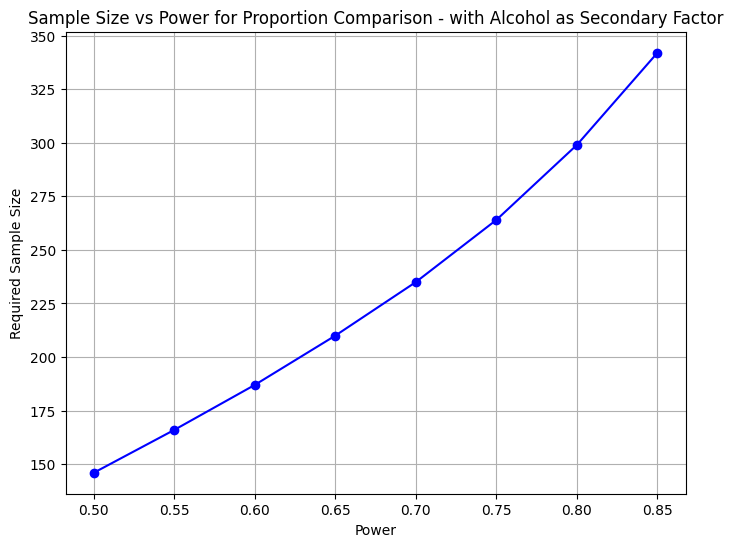

Power: 0.50, Sample Size: 146
Power: 0.55, Sample Size: 166
Power: 0.60, Sample Size: 187
Power: 0.65, Sample Size: 210
Power: 0.70, Sample Size: 235
Power: 0.75, Sample Size: 264
Power: 0.80, Sample Size: 299
Power: 0.85, Sample Size: 342


In [8]:
# Best to consider Proportions: 
# Primary factor: Group
# Secondary factor: Alcohol (in this case)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load microbiome diversity or proportion data
data = pd.read_csv('../data/Richness_total_Equal.csv')  # Equal number of samples
# For unequal groups, use: data = pd.read_csv('Richness_total.csv')
data['Alcohol'] = data['Alcohol'].apply(lambda x: 'No' if x == 'Never' else 'Yes')

# Define column names
group_column = 'Group'   # The column that defines 'Cases' and 'Controls'
shannon_column = 'Shannon'  # Column for Shannon diversity
alcohol_column = 'Alcohol'  # Column for Alcohol (Yes/No)

# Define a threshold for high Shannon diversity
shannon_threshold = 2.0  # Example threshold for high diversity

# Calculate proportions of high Shannon diversity stratified by Group and Alcohol
proportions = data.groupby([group_column, alcohol_column]).agg(
    High_Diversity_Proportion=('Shannon', lambda x: np.mean(x > shannon_threshold))
).reset_index()

# Print the proportions for each group
for index, row in proportions.iterrows():
    print(f"Proportion of High Diversity for {row[group_column]} with Alcohol {row[alcohol_column]}: {row['High_Diversity_Proportion']}")

# Get the proportions for Cases and Controls
P1_alcohol_yes = proportions.loc[(proportions[group_column] == 'Cases') & (proportions[alcohol_column] == 'Yes'), 'High_Diversity_Proportion'].values[0]
P1_alcohol_no = proportions.loc[(proportions[group_column] == 'Cases') & (proportions[alcohol_column] == 'No'), 'High_Diversity_Proportion'].values[0]

P2_alcohol_yes = proportions.loc[(proportions[group_column] == 'Controls') & (proportions[alcohol_column] == 'Yes'), 'High_Diversity_Proportion'].values[0]
P2_alcohol_no = proportions.loc[(proportions[group_column] == 'Controls') & (proportions[alcohol_column] == 'No'), 'High_Diversity_Proportion'].values[0]

# Print the proportions for Cases and Controls with Alcohol
print(f"Proportion P1 (Cases with Alcohol Yes): {P1_alcohol_yes}")
print(f"Proportion P1 (Cases with Alcohol No): {P1_alcohol_no}")
print(f"Proportion P2 (Controls with Alcohol Yes): {P2_alcohol_yes}")
print(f"Proportion P2 (Controls with Alcohol No): {P2_alcohol_no}")

# Function to calculate sample size for equal group sizes (Equation C)
def sample_size_equal_proportions(P1, P2, alpha=0.05, power=0.8):
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    numerator = 2 * (Z_alpha + Z_beta) ** 2 * (P1 * (1 - P1) + P2 * (1 - P2))
    denominator = (P1 - P2) ** 2
    
    if denominator == 0 or np.isnan(denominator):
        return np.nan  # Avoid division by zero
    return int(np.ceil(numerator / denominator))

# Function to calculate sample size for unequal group sizes (Equation D)
def sample_size_unequal_proportions(P1, P2, r, alpha=0.05, power=0.8):
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    numerator = (Z_alpha + Z_beta) ** 2 * (P1 * (1 - P1) + P2 * (1 - P2))
    denominator = (P1 - P2) ** 2
    
    if denominator == 0 or np.isnan(denominator):
        return np.nan  # Avoid division by zero
    
    n2 = int(np.ceil(numerator / denominator))  # Sample size of smaller group
    n1 = int(np.ceil(r * n2))  # Sample size of larger group
    return n1, n2

# Determine the group sizes and proportion differences
group_sizes = data.groupby(group_column).size()
n_case = group_sizes['Cases']
n_control = group_sizes['Controls']

# Determine if groups are equal or unequal in size
if n_case == n_control:
    print("Equal group sizes detected. Using Equation C.")
    sample_size_func = sample_size_equal_proportions
else:
    print(f"Unequal group sizes detected (Case: {n_case}, Control: {n_control}). Using Equation D.")
    ratio = max(n_case, n_control) / min(n_case, n_control)
    sample_size_func = lambda P1, P2, alpha, power: sample_size_unequal_proportions(P1, P2, ratio, alpha, power)

# Define power levels and significance level
power_levels = np.arange(0.5, 0.9, 0.05)  # Power levels
alpha = 0.05

# Calculate sample sizes for different power levels
sample_sizes = []
for power in power_levels:
    sample_size = sample_size_func(P1_alcohol_yes, P2_alcohol_yes, alpha, power)  # Example using Alcohol Yes group
    if isinstance(sample_size, tuple):
        sample_sizes.append(max(sample_size))  # Use the larger sample size for unequal groups
    elif np.isnan(sample_size):
        print(f"Sample size calculation failed for power: {power}")
        sample_sizes.append(np.nan)
    else:
        sample_sizes.append(sample_size)

# Plotting power vs. sample size
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes, marker='o', linestyle='-', color='b')
plt.title('Sample Size vs Power for Proportion Comparison - with Alcohol as Secondary Factor')
plt.xlabel('Power')
plt.ylabel('Required Sample Size')
plt.grid(True)
plt.show()

# Print the results
for power, sample_size in zip(power_levels, sample_sizes):
    print(f"Power: {power:.2f}, Sample Size: {sample_size}")
